In [34]:
# first things first: calculate snow melt, rainfall and glaciel melt -> these will be 3 IN components 


In [47]:
incomp = 1600 +315
outcomp = 390+ 1294 


In [48]:
incomp - outcomp

231

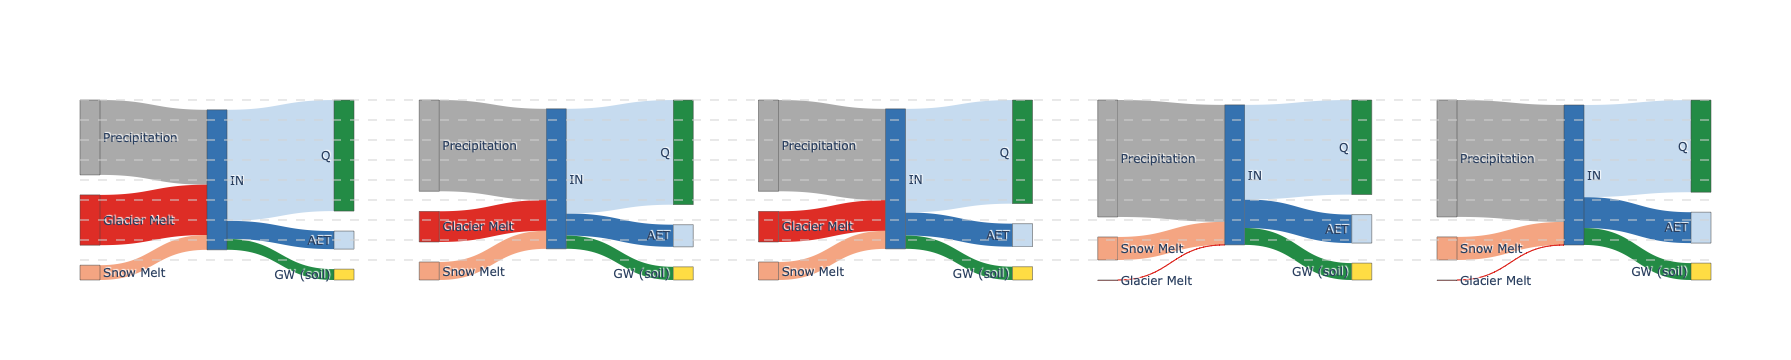

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define labels (Nodes) - same for both diagrams
labels = ["Precipitation", "Snow Melt", "Glacier Melt",
          "IN", "AET", "Q", "GW (soil)"]

# Define flows (source -> target)
source = [0, 1, 2,  # Rainfall, Snow Melt, Glacier Melt -> IN
          3, 3, 3]  # IN -> AET, Q, GW (soil)

target = [3, 3, 3,  # Rainfall, Snow Melt, Glacier Melt -> IN
          4, 5, 6]  # IN -> AET, Q, GW (soil)




#  **Panel 1** 
values1 = [1600, 316, 1075,  # Rainfall, Snow Melt, Glacier Melt
           386, 2372, 232 ]  # AET, Q, GW (soil)
total_in1 = sum(values1[:3])  

# Values for **Panel 2** (Second Dataset)
values2 = [1600, 316, 538,  # Inputs -> IN
           388, 1834, 231]  # IN -> Outputs
total_in2 = sum(values2[:3])  # Compute total IN


#  **Panel 3** 
values3 = [1600, 316, 538,  # Rainfall, Snow Melt, Glacier Melt
           404, 1816, 233 ]  # AET, Q, GW (soil)
total_in3 = sum(values3[:3])  


#  **Panel 4** 
values4 = [1600, 315, 0.1,  # Rainfall, Snow Melt, Glacier Melt
           390, 1294, 231]  # AET, Q, GW (soil)
total_in4 = sum(values4[:3])  



#  **Panel 5** 
values5 = [1600, 316, 0.1,  # Rainfall, Snow Melt, Glacier Melt
           423, 1261, 231]  # AET, Q, GW (soil)
total_in5 = sum(values5[:3])  















# # **Find the max IN value** to set consistent scaling
# max_in = max(total_in1, total_in2, total_in3, total_in4, total_in5)

# # **Normalize all values based on the largest total IN**
# scaling_factor = 1 / max_in  # Scale everything proportionally

# # Scale values to keep IN proportional while maintaining comparable structure
# scaled_values1 = [v * scaling_factor for v in values1]
# scaled_values2 = [v * scaling_factor for v in values2]
# scaled_values3 = [v * scaling_factor for v in values3]
# scaled_values4 = [v * scaling_factor for v in values4]
# scaled_values5 = [v * scaling_factor for v in values5]








# # Define colors
node_colors = ["#aaa", "#f4a582", "#de2d26", "#3572b0", "#c6dbef", "#238b45", "#ffdd44"]
link_colors = ["#aaa", "#f4a582", "#de2d26", "#3572b0", "#c6dbef", "#238b45", "#ffdd44"]

# Create side-by-side Sankey diagrams
fig = make_subplots(
    rows=1, cols=5, 
    # subplot_titles=["Panel 1: Dataset A", "Panel 2: Dataset B"],
    specs=[[{"type": "domain"},{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}]]  # Ensure Sankey compatibility
)








# **Panel 1 (Left)**
fig.add_trace(go.Sankey(
    node=dict(label=labels, color=node_colors),
    link=dict(source=source, target=target, value=values1, color=node_colors)
), row=1, col=1)

# **Panel 2 (Right)**
fig.add_trace(go.Sankey(
    node=dict(label=labels, color=node_colors),
    link=dict(source=source, target=target, value=values2, color=link_colors)
), row=1, col=2)

# **Panel 3 (Right)**
fig.add_trace(go.Sankey(
    node=dict(label=labels, color=node_colors),
    link=dict(source=source, target=target, value=values3, color=link_colors)
), row=1, col=3)


# **Panel 4 (Right)**
fig.add_trace(go.Sankey(
    node=dict(label=labels, color=node_colors),
    link=dict(source=source, target=target, value=values4, color=link_colors)
), row=1, col=4)

# **Panel 5(Right)**
fig.add_trace(go.Sankey(
    node=dict(label=labels, color=link_colors),
    link=dict(source=source, target=target, value=values5, color=link_colors)
), row=1, col=5)



# -------------------------- **Gridlines** (Simulated using Shapes)
grid_lines = []
num_lines = 9  # Number of grid lines
spacing = 100 / num_lines  # Equal spacing for gridlines

for i in range(1, num_lines + 1):
    y_pos = i / num_lines  # Convert to a normalized position
    grid_lines.append(dict(
        type="line",
        x0=0, x1=1,  # Full width
        y0=y_pos, y1=y_pos,
        xref="paper", yref="paper",  # Apply to full figure
        line=dict(color="lightgray", width=1, dash="dash")
    ))

# Update layout with gridlines
fig.update_layout(
    # title_text="Side-by-Side Hydrological Budget Sankey Diagram (With Gridlines)",
    font_size=12,
    shapes=grid_lines  # Add gridlines to the figure
)

# # Show the figure
fig.show()


# try to plot barplots with hydrology for both mustang and langtang

In [35]:

langtang1 = pd.DataFrame({
    "Variable": ["aet", "pet", "Q", "glmelt", "snowmelt", "pr", "snowacc", "rainfall"],
    "Value": [386.382695, 718.870731, 2372.422865, 1075.562082, 315.896519, 1916.213203, 548.666848, 1600.316684]})


langtang2 = pd.DataFrame({
    "Variable": ["aet", "pet", "Q", "glmelt", "snowmelt", "pr", "snowacc", "rainfall"],
    "Value": [388.228399, 728.996256, 1833.531970, 538.516890, 315.896519, 1916.213203, 548.666848, 1600.316684]})

langtang3 = pd.DataFrame({
    "Variable": ["aet", "pet", "Q", "glmelt", "snowmelt", "pr", "snowacc", "rainfall"],
    "Value": [404.912404, 762.000153, 1816.798114, 538.516890, 315.896519, 1916.213203, 548.666848, 1600.316684]})

langtang4 = pd.DataFrame({
    "Variable": ["aet", "pet", "Q", "glmelt", "snowmelt", "pr", "snowacc", "rainfall"],
    "Value": [390.074103, 739.121780, 1294.641074, 1.471698, 315.896519, 1916.213203, 548.666848, 1600.316684]})

langtang5 = pd.DataFrame({
    "Variable": ["aet", "pet", "Q", "glmelt", "snowmelt", "pr", "snowacc", "rainfall"],
    "Value": [423.442113, 805.129574, 1261.173364, 1.471698, 315.896519, 1916.213203, 548.666848, 1600.316684]})





In [63]:
# Add a new column for each DataFrame name
langtang1['landcover'] = 'langtang1'
langtang2['landcover'] = 'langtang2'
langtang3['landcover'] = 'langtang3'
langtang4['landcover'] = 'langtang4'
langtang5['landcover'] = 'langtang5'

# Concatenate all DataFrames vertically, using the 'Date' column as the identifier
df = pd.concat([langtang1, langtang2, langtang3, langtang4, langtang5])

# Set 'Date' as the index
df.set_index('landcover', inplace=True)

# Display the merged DataFrame
df.head()

,Variable,Value
landcover,,
langtang1,aet,386.382695
langtang1,pet,718.870731
langtang1,Q,2372.422865
langtang1,glmelt,1075.562082
langtang1,snowmelt,315.896519


In [64]:
# MUSTANG

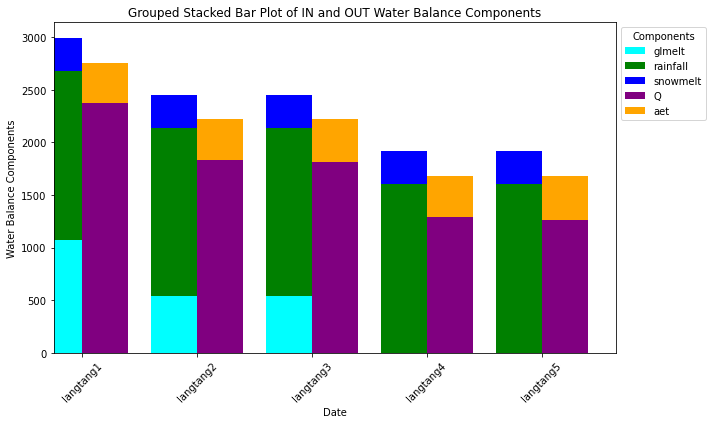

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data (same as before, assuming you've already merged them as `df`)
# Add IN and OUT components
in_components = ['glmelt', 'snowmelt', 'rainfall']  # IN components
out_components = ['aet', 'Q']   # OUT components

# Separate IN and OUT components from the merged DataFrame
in_df = df[df['Variable'].isin(in_components)]
out_df = df[df['Variable'].isin(out_components)]

# Pivot the data so that 'Date' is the index and 'Variable' becomes columns for IN and OUT
in_pivot = in_df.pivot_table(index='landcover', columns='Variable', values='Value', aggfunc='sum')
out_pivot = out_df.pivot_table(index='landcover', columns='Variable', values='Value', aggfunc='sum')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the IN components stacked bar plot
in_pivot.plot(kind='bar', stacked=True, width=0.4, position=1, color=['cyan', 'green', 'blue'], ax=ax)

# Plot the OUT components stacked bar plot
out_pivot.plot(kind='bar', stacked=True, width=0.4, position=0, color=['purple', 'orange', 'red'], ax=ax)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Water Balance Components")
plt.title("Grouped Stacked Bar Plot of IN and OUT Water Balance Components")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title="Components", loc='upper left', bbox_to_anchor=(1,1))  # Legend outside the plot

# Show the plot
plt.tight_layout()
plt.show()
